In [1]:
seed = 0

In [2]:
# !pip install pandas

In [3]:
import numpy as np
import pandas as pd
import warnings
pd.options.display.float_format = '{:20,.0f}'.format
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('used_cars.csv')

In [5]:
# Encode features
df['manufacturer'] = df['manufacturer'].astype('category')
df['color'] = df['color'].astype('category')

df['manufacturer_idx'] = df['manufacturer'].cat.codes
df['color_idx'] = df['color'].cat.codes

In [6]:
# !pip3 install scikit-learn

In [7]:
import sklearn.ensemble

In [8]:
features = ['manufacturer_idx', 'color_idx', 'had_accident', 'resold', 'automatic_transmission']
target = ['price']
X = df[features].values
y = df[target].values.reshape(-1,)
regressor = sklearn.ensemble.RandomForestRegressor(random_state=seed)
regressor.fit(X, y)
print(regressor.feature_importances_)

[0.13348598 0.128023   0.07763028 0.61769177 0.04316897]


In [9]:
# How well the regressor explains the target from the features
regressor.score(X, y)

0.15116899319835841

In [10]:
predicted = regressor.predict(X)
df['price_predicted'] = predicted

In [11]:
# !pip3 install matplotlib

In [12]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

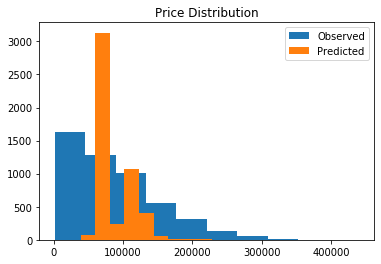

In [13]:
plt.hist(y)
plt.hist(predicted)
plt.title('Price Distribution')
plt.legend(('Observed', 'Predicted'))
plt.show()

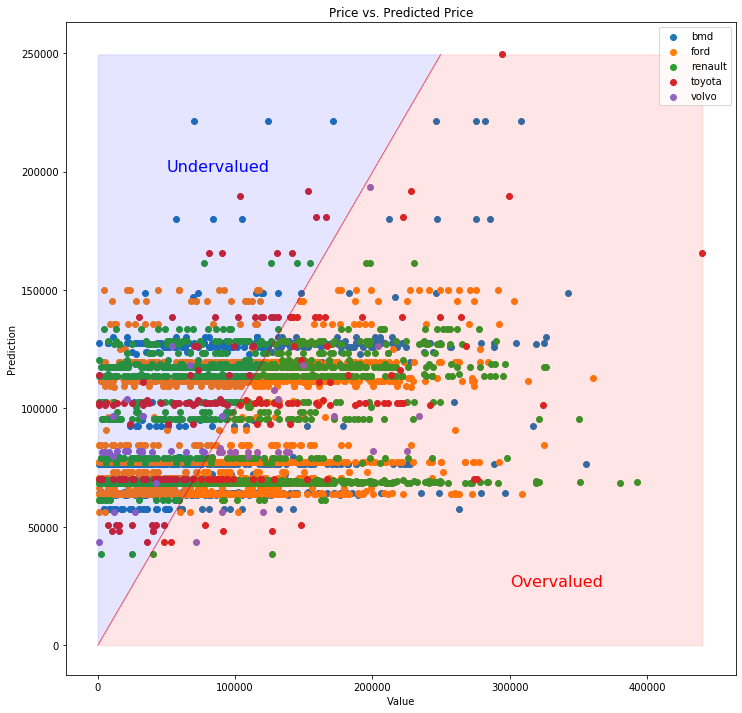

In [14]:
plt.figure(figsize=(12, 12))
for i, manufacturer in enumerate(df['manufacturer'].cat.categories):
    y_i = y[df['manufacturer'] == manufacturer]
    predicted_i = predicted[df['manufacturer'] == manufacturer]
    plt.scatter(y_i, predicted_i, label=manufacturer)
plt.xlabel('Value')
plt.ylabel('Prediction')
plt.title('Price vs. Predicted Price')
xlim = max(y)
ylim = max(predicted)
plt.plot([0, ylim], [0, ylim], '-r', linewidth=0.5)
plt.fill_between([0, ylim], [0, ylim], [ylim, ylim], color='blue', alpha=0.1)
plt.fill_betweenx([0, ylim], [0, ylim], [xlim, xlim], color='red', alpha=0.1)
plt.text(50000, 200000, 'Undervalued', fontsize=16, color='blue')
plt.text(300000, 25000, 'Overvalued', fontsize=16, color='red')
plt.legend()
plt.show()